### 10.3.1. Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 10.3.2. Importing the Dataset

In [2]:
data_path = "E:/Datasets/imdb_reviews.csv"
#reading the CSV datafile
movie_dataset = pd.read_csv(data_path, engine='python')

#printing the dataset header
movie_dataset.head()

,SentimentText,Sentiment
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [3]:
#printing the dataset shape
movie_dataset.shape

(25000, 2)

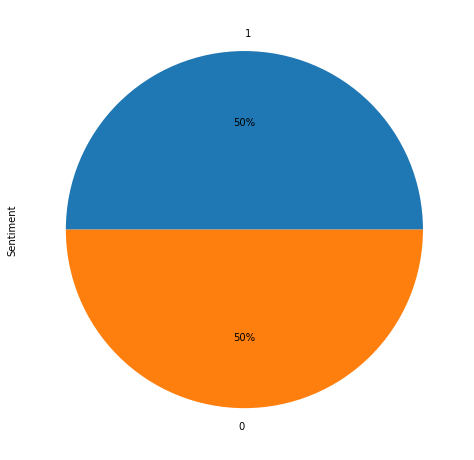

In [4]:
#increasing default plotsize
plt.rcParams["figure.figsize"] = [8,10] 

#printing pie chart that displaying distribution of sentiment
movie_dataset.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

### 10.3.3. Cleaning the Data

In [5]:
#creating feature set
X = movie_dataset["SentimentText"]

#creating label set
y = movie_dataset["Sentiment"]


In [6]:
#cleaning feature set (email messages)
def clean_text(doc):

    #removing everything except capital and small letters
    document = re.sub('[^a-zA-Z]', ' ', doc)
    
    #removing single characters
    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    #removing multiple empty spaces
    document = re.sub(r'\s+', ' ', document)

    return document



In [7]:
X_sentences = []

#creating a list of sentences
reviews = list(X)

#cleaning all sentences using clean_text() function
for rev in reviews:
    X_sentences.append(clean_text(rev))

### 10.3.4. Converting Text to Numbers

In [8]:
#importing stopwords and TFIDF vectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

#converting email messages to text via TFIDF vectorizer
vectorizer = TfidfVectorizer (max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

### 10.3.5. Training the Model

In [9]:
#dividing the data into the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [10]:
#training Random Forest Classifier on the training data
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=250, random_state=0)

### 10.3.6. Evaluating Model Performance

In [15]:
#making predictions on the test set
y_pred = clf.predict(X_test)


#evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2078  405]
 [ 420 2097]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      2483
           1       0.84      0.83      0.84      2517

    accuracy                           0.83      5000
   macro avg       0.83      0.84      0.83      5000
weighted avg       0.84      0.83      0.84      5000

0.835


### 10.3.7 Making Prediction on Single Instance

In [13]:
print(clf.predict(vectorizer.transform(["The movie was really good, I liked it"])))

[1]


In [14]:
print(clf.predict(vectorizer.transform(["It was an awful movie, waste of time and money"])))

[0]


## Exercise 10.1

**Question 1:**

Which attribute of the TfidfVectorizer vectorizer is used to define the minimum word count:

A. min_word

B. min_count

C. min_df

D. None of the Above

**Answer: C**
    

**Question 2:**

Which method of the RandomForestClassifier object is used to train the algorithm on the input data:

A. train()

B. fit()

C. predict()
 
D. train_data()

**Answer: B**
    
    
**Question 3:**

Sentimental analysis with RandomForestClassifier is a type of _______ learning problem

A. Supervised 

B. Unsupervised

C. Reinforcement

D. Lazy
    
**Answer: A**

## Exercise 10.2

Import "spam.csv" file from the resources folder. The dataset contain ham and spam text messages. Write a Python application that uses Scikit-Learn to classify ham and spam messages in the dataset. The column "v1" contains text label, while the column "v2" contains the text of the message. 

**Solution:**

In [17]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_path = "E:/Datasets/spam.csv"
movie_dataset = pd.read_csv(data_path, engine='python')

X = movie_dataset["v2"]

y = movie_dataset["v1"]

def clean_text(doc):


    document = re.sub('[^a-zA-Z]', ' ', doc)

    document = re.sub(r"\s+[a-zA-Z]\s+", ' ', document)

    document = re.sub(r'\s+', ' ', document)

    return document

X_sentences = []
reviews = list(X)
for rev in reviews:
    X_sentences.append(clean_text(rev))
    

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X= vectorizer.fit_transform(X_sentences).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=250, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[963   2]
 [ 20 130]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.98      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

0.9802690582959641
